In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Dataset

In [101]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data investigation

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [103]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Changing reservation_status_date to datetime

In [104]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

#### Checking values in columns

In [105]:
obj_columns = df.select_dtypes(include='object').columns
obj_columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [106]:
for col in obj_columns:
  print(f"{col} : {df[col].unique()}")

hotel : ['Resort Hotel' 'City Hotel']
arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' '

#### Replacing 'Undefined' with nan values

In [107]:
df.replace('Undefined',np.nan, inplace = True)

#### Number of missing values

In [108]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                1169
country                              488
market_segment                         2
distribution_channel                   5
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Converting iso country code to country name 

In [109]:
! pip install pycountry 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
import pycountry

In [111]:
def country_name(country_code):
  try:
    return pycountry.countries.get(alpha_3=country_code).name
  except:
    return np.nan

In [112]:
df['country'] = df['country'].apply(country_name)

## Adding column season

In [113]:
def season(month):
  if month in ['December',  'January','February']:
    return 'Winter'
  elif month in ['March' ,'April', 'May']:
    return 'Spring'  
  elif month in ['June' ,'July', 'August']:
    return 'Summer'
  else:
    return 'Autumn'

df['arrival_season'] = df['arrival_date_month'].apply(season)

In [114]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_season
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Summer
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Summer
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Summer
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Summer
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Summer


## Adding column total nights

In [115]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_season,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Summer,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Summer,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Summer,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Summer,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Summer,2


## Exploratory Data Analysis (EDA)

#### which hotel type is visited the most?

In [116]:
res = df[['hotel']].value_counts()
res

hotel       
City Hotel      79330
Resort Hotel    40060
dtype: int64

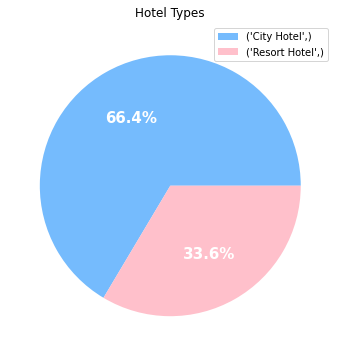

In [117]:
fig , ax = plt.subplots(figsize=[10,6])
plt.title('Hotel Types')
patches, text , pcts =ax.pie(res.values, labels=res.index, colors=['xkcd:sky blue','#FFC0CB'], autopct='%.1f%%')
plt.setp(pcts, color='white', fontweight='bold', fontsize=15)
plt.setp(text,color='white')
plt.legend()
plt.show()


#### what year had the largest number of reservations?

In [118]:
res = df['arrival_date_year'].value_counts().sort_values(ascending=False)
res

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

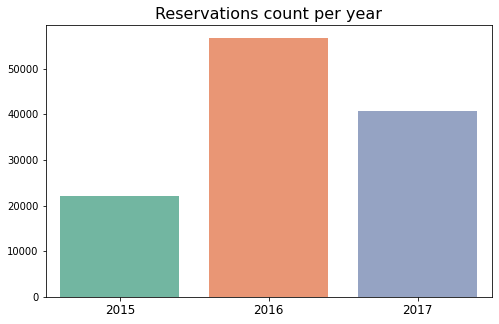

In [119]:
plt.figure(figsize=[8,5])
plt.title('Reservations count per year',fontsize=16)
sns.barplot(x=res.index , y = res.values,palette='Set2')
plt.xticks(fontsize=12)
plt.show()

#### Which month had the most reservations?

In [120]:
res =df[['arrival_date_month']].value_counts()
res


arrival_date_month
August                13877
July                  12661
May                   11791
October               11160
April                 11089
June                  10939
September             10508
March                  9794
February               8068
November               6794
December               6780
January                5929
dtype: int64

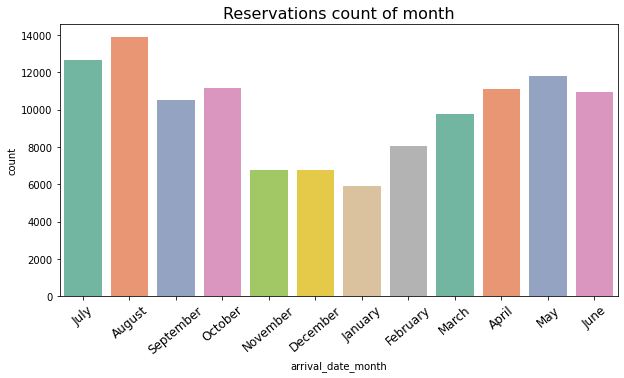

In [121]:
plt.figure(figsize=[10,5])
plt.title('Reservations count of month',fontsize=16)
sns.countplot(x= df['arrival_date_month'],palette='Set2')
plt.xticks(fontsize=12,rotation=40)
plt.show() 

#### Which season has the largest number of reservations?

In [122]:
season_total_reservations= df.groupby('arrival_season')['total_nights'].sum().sort_values(ascending=False)
season_total_reservations

arrival_season
Summer    142898
Spring    109458
Autumn     92979
Winter     63922
Name: total_nights, dtype: int64

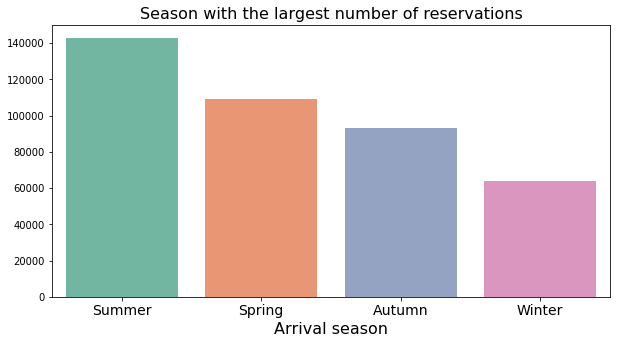

In [123]:
plt.figure(figsize=[10,5])
plt.title('Season with the largest number of reservations', fontsize=16)
sns.barplot(x=season_total_reservations.index,y=season_total_reservations.values,palette='Set2')
plt.xticks(fontsize=14)
plt.xlabel('Arrival season',fontsize=16)
plt.show()

#### Which room type have been reserved the most?

In [124]:
room_types = df['reserved_room_type'].value_counts().sort_values(ascending=False)
room_types

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

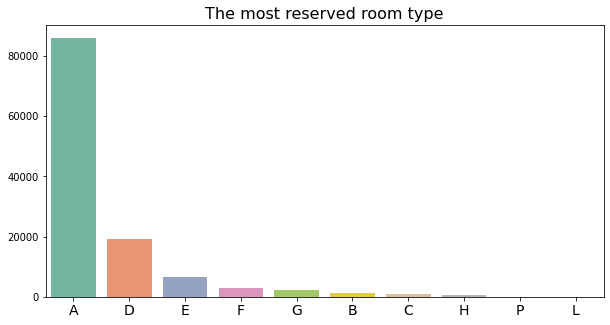

In [125]:
plt.figure(figsize=[10,5])
plt.title('The most reserved room type', fontsize=16)
sns.barplot(x=room_types.index,y=room_types.values,palette='Set2')
plt.xticks(fontsize=14)
plt.show()

#### What is the average number of adults per reservation?

In [126]:
avg_number_of_adults = df['adults'].mean()
np.ceil(avg_number_of_adults)

2.0

#### what is the average number of children/babies per reservation?

In [127]:
avg_number_of_children = df['children'].mean()
np.ceil(avg_number_of_children)

1.0

In [128]:
avg_number_of_babies = df['babies'].mean()
np.ceil(avg_number_of_babies)

1.0

#### How many reservations have been cancelled?

In [129]:
res = df['is_canceled'].value_counts()
res

0    75166
1    44224
Name: is_canceled, dtype: int64

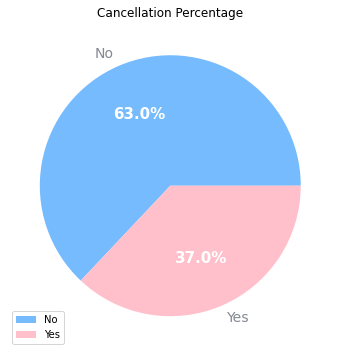

In [130]:
fig , ax = plt.subplots(figsize=[10,6])
plt.title('Cancellation Percentage')
patches, text , pcts =ax.pie(res.values, labels=['No','Yes'], colors=['xkcd:sky blue','#FFC0CB'], autopct='%.1f%%')
plt.setp(pcts, color='white', fontweight='bold', fontsize=15)
plt.setp(text,fontsize=14, color='#848A93')
plt.legend()
plt.show()


#### Which hotel type had the largest number of cancellations?

In [131]:
cancellations = df[df['is_canceled']==1]['hotel'].value_counts()
cancellations

City Hotel      33102
Resort Hotel    11122
Name: hotel, dtype: int64

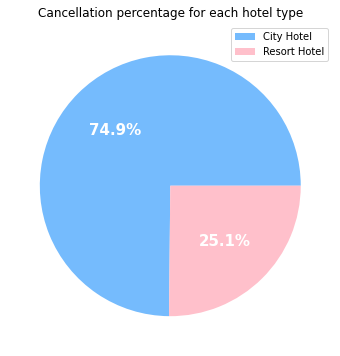

In [132]:
fig , ax = plt.subplots(figsize=[10,6])
plt.title('Cancellation percentage for each hotel type')
patches, text , pcts =ax.pie(cancellations.values, labels=cancellations.index, colors=['xkcd:sky blue','#FFC0CB'], autopct='%.1f%%')
plt.setp(pcts, color='white', fontweight='bold', fontsize=15)
plt.setp(text,color='white')
plt.legend()
plt.show()

#### How many loyal clients do we have?

In [133]:
loyal_clients = df['is_repeated_guest'].value_counts()
loyal_clients

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

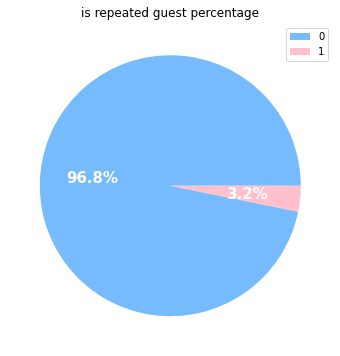

In [134]:
fig , ax = plt.subplots(figsize=[10,6])
plt.title('is repeated guest percentage')
patches, text , pcts =ax.pie(loyal_clients.values, labels=loyal_clients.index, colors=['xkcd:sky blue','#FFC0CB'], autopct='%.1f%%')
plt.setp(pcts, color='white', fontweight='bold', fontsize=15)
plt.setp(text,color='white')
plt.legend()
plt.show()

#### How many loyal clients do we have for each hotel type?

In [135]:
loyal_clients = df[df['is_repeated_guest']==1]
hotel_loyal_clients = loyal_clients['hotel'].value_counts()
hotel_loyal_clients

City Hotel      2032
Resort Hotel    1778
Name: hotel, dtype: int64

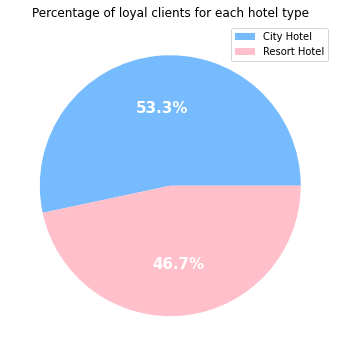

In [136]:
fig , ax = plt.subplots(figsize=[10,6])
plt.title('Percentage of loyal clients for each hotel type')
patches, text , pcts =ax.pie(hotel_loyal_clients.values, labels=hotel_loyal_clients.index, colors=['xkcd:sky blue','#FFC0CB'], autopct='%.1f%%')
plt.setp(pcts, color='white', fontweight='bold', fontsize=15)
plt.setp(text,color='white')
plt.legend()
plt.show()

#### What are the top 10 countries of our guests?

In [137]:
top_countries = df['country'].value_counts().sort_values(ascending=False)
top_ten_countries = top_countries[0:10]
top_ten_countries

Portugal          48590
United Kingdom    12129
France            10415
Spain              8568
Germany            7287
Italy              3766
Ireland            3375
Belgium            2342
Brazil             2224
Netherlands        2104
Name: country, dtype: int64

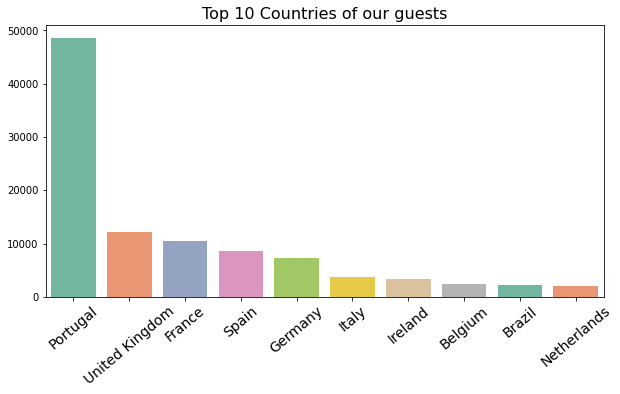

In [138]:
plt.figure(figsize=[10,5])
plt.title('Top 10 Countries of our guests', fontsize=16)
sns.barplot(x=top_ten_countries.index,y=top_ten_countries.values,palette='Set2')
plt.xticks(fontsize=14,rotation=40)
plt.show()

#### What are the top 10 countries for each hotel type?

In [139]:
resort_guest_countries = df[df['hotel']=='Resort Hotel']['country'].value_counts().sort_values(ascending=False)[0:10]
city_guest_countries = df[df['hotel']=='City Hotel']['country'].value_counts().sort_values(ascending=False)[0:10]

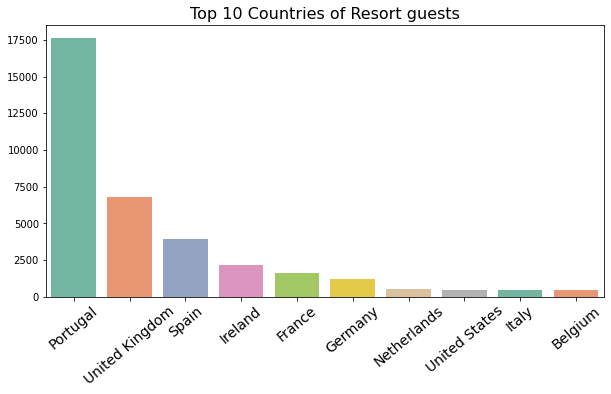

In [140]:
plt.figure(figsize=[10,5])
plt.title('Top 10 Countries of Resort guests', fontsize=16)
sns.barplot(x=resort_guest_countries.index,y=resort_guest_countries.values,palette='Set2')
plt.xticks(fontsize=14,rotation=40)
plt.show()

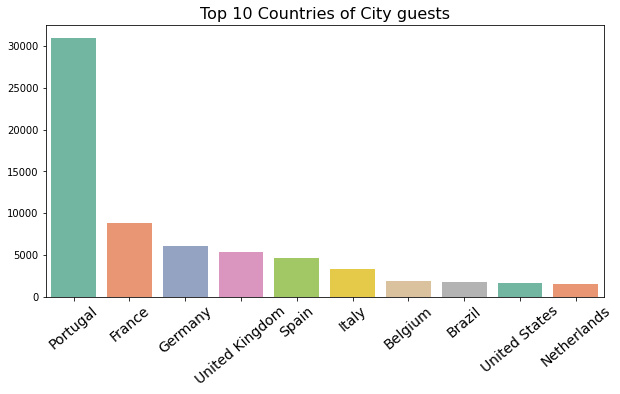

In [141]:
plt.figure(figsize=[10,5])
plt.title('Top 10 Countries of City guests', fontsize=16)
sns.barplot(x=city_guest_countries.index,y=city_guest_countries.values,palette='Set2')
plt.xticks(fontsize=14,rotation=40)
plt.show()

#### What is the count of each market segemnt?

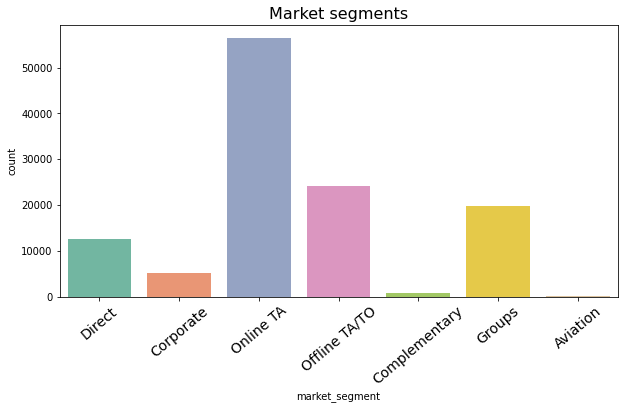

In [142]:
plt.figure(figsize=[10,5])
plt.title('Market segments', fontsize=16)
sns.countplot(x=df['market_segment'],palette='Set2')
plt.xticks(fontsize=14,rotation=40)
plt.show()

#### What is the percentage of clients who have paid deposite?

In [143]:
deposite=df['deposit_type'].value_counts()

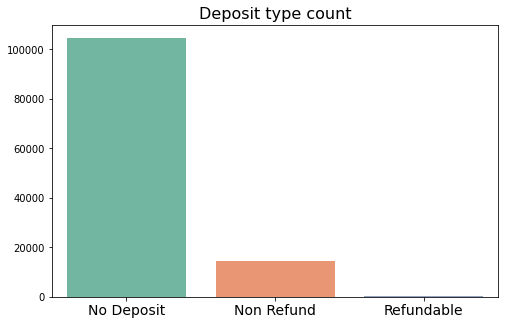

In [144]:
plt.figure(figsize=[8,5])
plt.title('Deposit type count', fontsize=16)
sns.barplot(x=deposite.index,y=deposite.values,palette='Set2')
plt.xticks(fontsize=14)
plt.show()

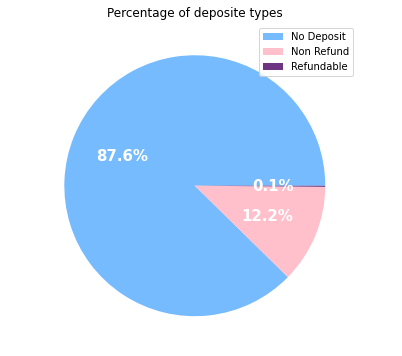

In [145]:
fig , ax = plt.subplots(figsize=[10,6])
plt.title('Percentage of deposite types')
patches, text , pcts =ax.pie(deposite.values, labels=deposite.index, colors=['xkcd:sky blue','#FFC0CB','#6C3483'], autopct='%.1f%%')
plt.setp(pcts, color='white', fontweight='bold', fontsize=15)
plt.setp(text,color='white')
plt.legend()
plt.show()

#### relation between cancelation statues and deposit type

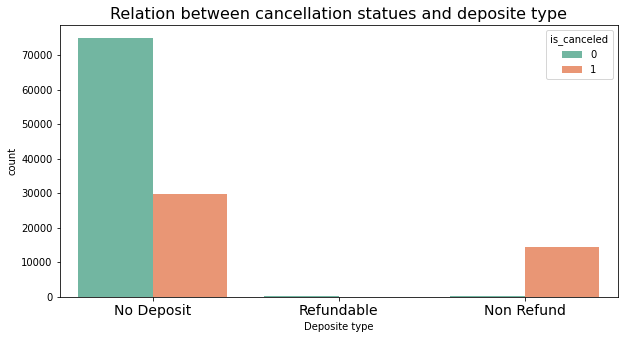

In [146]:
plt.figure(figsize=[10,5])
plt.title('Relation between cancellation statues and deposite type', fontsize=16)
sns.countplot(x=df['deposit_type'], hue=df['is_canceled'],palette='Set2')
plt.xticks(fontsize=14)
plt.xlabel('Deposite type')
plt.show()

#### What is the top 10 agencies that provide the hotel with clients for each hotel type?

In [147]:
resort_guest_agencies = df[df['hotel']=='Resort Hotel']['agent'].value_counts().sort_values(ascending=False).iloc[0:10]
city_guest_agencies = df[df['hotel']=='City Hotel']['agent'].value_counts().sort_values(ascending=False).iloc[0:10]

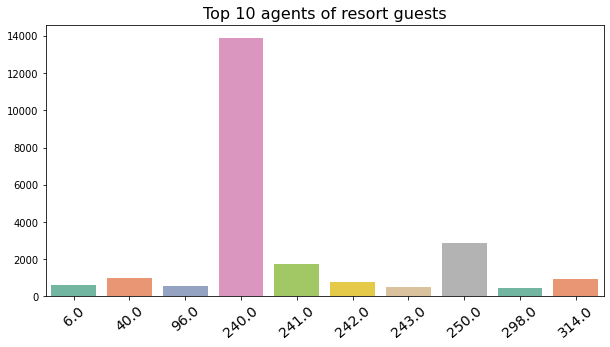

In [148]:
plt.figure(figsize=[10,5])
plt.title('Top 10 agents of resort guests', fontsize=16)
sns.barplot(x=resort_guest_agencies.index,y=resort_guest_agencies.values,palette='Set2')
plt.xticks(fontsize=14,rotation=40)
plt.show()

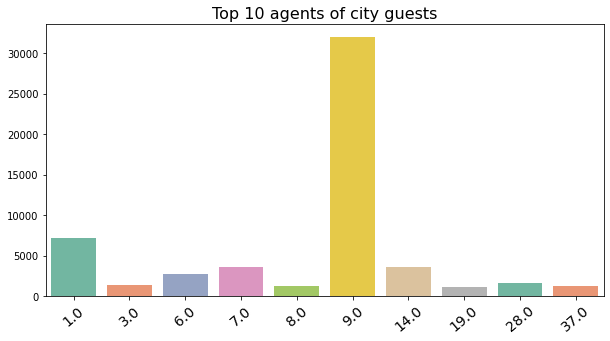

In [149]:
plt.figure(figsize=[10,5])
plt.title('Top 10 agents of city guests', fontsize=16)
sns.barplot(x=city_guest_agencies.index,y=city_guest_agencies.values,palette='Set2')
plt.xticks(fontsize=14,rotation=40)
plt.show()

####What is the average number of waiting list days?

In [150]:
avg_waiting_list = df['days_in_waiting_list'].mean()
np.floor(avg_waiting_list)

2.0

#### What is the count of each customer type?

In [151]:
res= df['customer_type'].value_counts().to_frame()
res['customer_type'] = res['customer_type']/len(df) * 100
res 

,customer_type
Transient,75.059050
Transient-Party,21.043638
Contract,3.414021
Group,0.483290


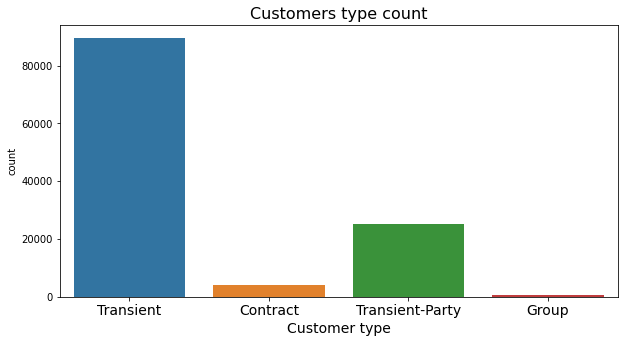

In [152]:
plt.figure(figsize=[10,5])
plt.title('Customers type count', fontsize=16)
sns.countplot(x=df['customer_type'])
plt.xticks(fontsize=14)
plt.xlabel("Customer type",fontsize=14)
plt.show()

#### What is the average number of car spaces requested?

In [153]:
avg_car_spaces = df['required_car_parking_spaces'].mean()
avg_car_spaces

0.06251779881062065

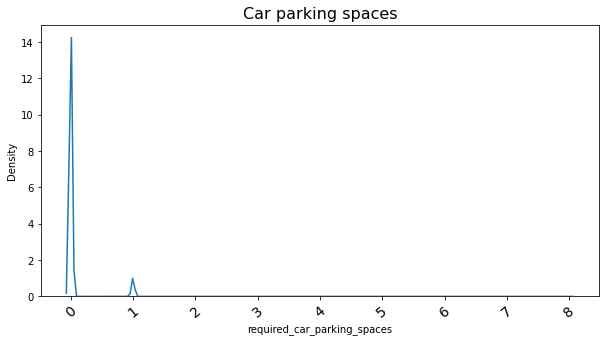

In [154]:
plt.figure(figsize=[10,5])
plt.title('Car parking spaces', fontsize=16)
sns.kdeplot(x=df['required_car_parking_spaces'])
plt.xticks(fontsize=14,rotation=40)
plt.show()

#### How many clients have requested at least one parking space?

In [155]:
total_requested_parking_space = len(df['required_car_parking_spaces'])
requested_parking_space_percentage = len(df[df['required_car_parking_spaces']>0])/total_requested_parking_space *100
requested_parking_space_percentage

6.211575508836586

#### Which season had the best total average daily rate?

In [156]:
season_adr = df.groupby('arrival_season')['adr'].sum().sort_values(ascending=False)
season_adr

arrival_season
Summer    4825867.74
Spring    3184927.86
Autumn    2586287.86
Winter    1560534.14
Name: adr, dtype: float64

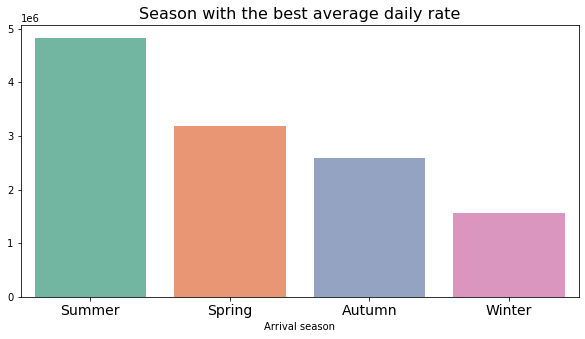

In [157]:
plt.figure(figsize=[10,5])
plt.title('Season with the best average daily rate', fontsize=16)
sns.barplot(x=season_adr.index,y=season_adr.values,palette='Set2')
plt.xticks(fontsize=14)
plt.xlabel('Arrival season')
plt.show()

#### Changes of average daily rate over the years

In [158]:
res = df.groupby('arrival_date_year')[['adr']].sum().sort_index()
res

,adr
arrival_date_year,
2015,1917578.62
2016,5575764.71
2017,4664274.27


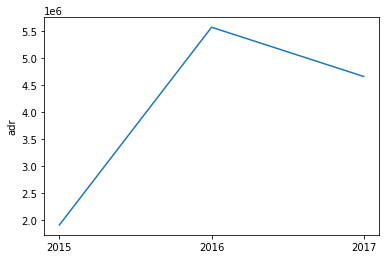

In [159]:
sns.lineplot(x=['2015','2016','2017'],y=res['adr'])
plt.show()

#### Heatmap of our dataset

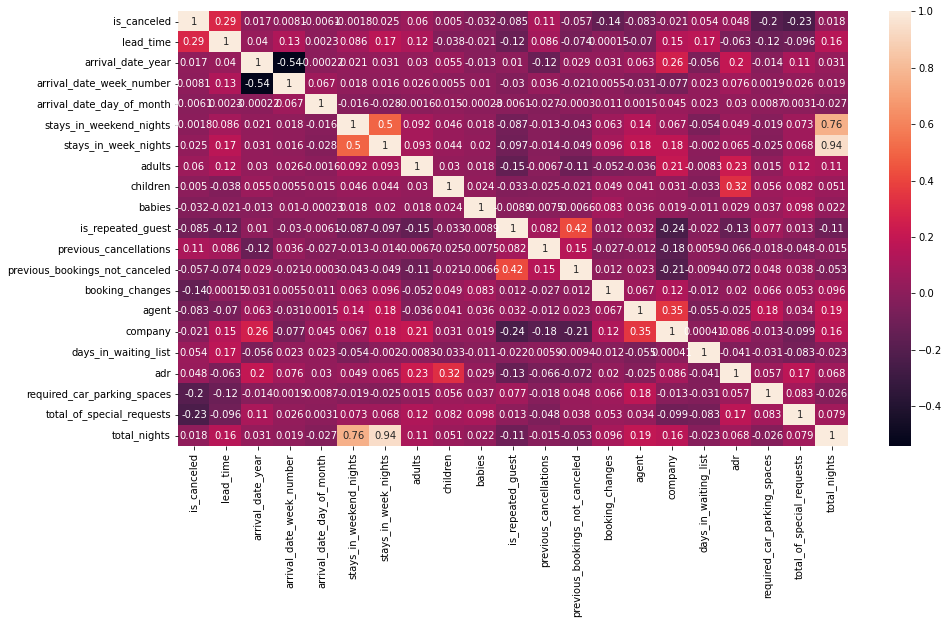

In [160]:
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(),annot=True)
plt.show()

#### which customer type makes cancelation the most?

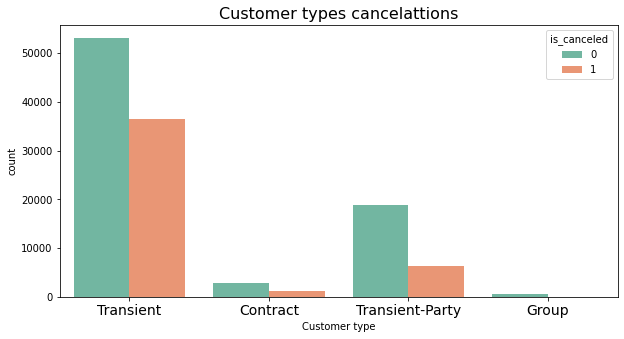

In [161]:
plt.figure(figsize=[10,5])
plt.title('Customer types cancelattions', fontsize=16)
sns.countplot(x=df['customer_type'], hue=df['is_canceled'],palette='Set2')
plt.xticks(fontsize=14)
plt.xlabel('Customer type')
plt.show()

#### kde plot for cancellation statues and adr

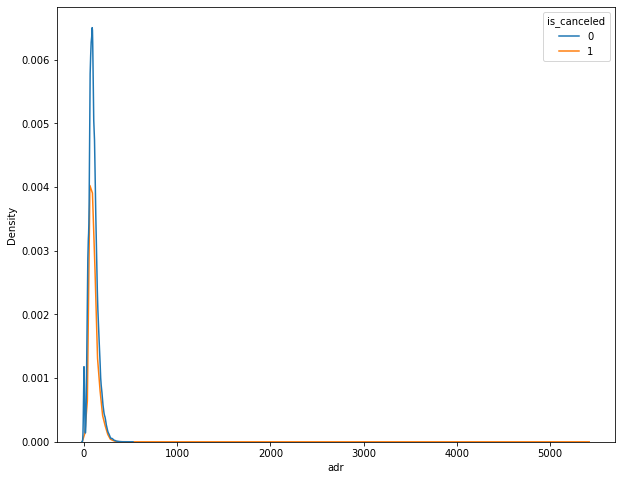

In [162]:
plt.figure(figsize=[10,8])
sns.kdeplot(df['adr'],hue=df['is_canceled'])
plt.show()

#### How many customer have made changes and then cancelled their reservation?

In [163]:
made_changes = df[df['booking_changes']>0]['is_canceled'].value_counts()
made_changes_total = len(df[df['booking_changes']>0])
made_changes/made_changes_total * 100

0    84.327285
1    15.672715
Name: is_canceled, dtype: float64

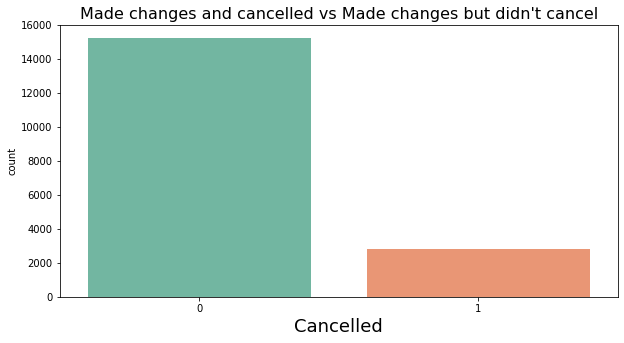

In [164]:
plt.figure(figsize=[10,5])
plt.title("Made changes and cancelled vs Made changes but didn't cancel",fontsize=16)
sns.countplot(x=df[df['booking_changes']>0]['is_canceled'],palette='Set2')
plt.xlabel('Cancelled',fontsize=18)
plt.show()

## Handling missing values

In [165]:
 df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                1169
country                             1770
market_segment                         2
distribution_channel                   5
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

we have missing values :
*   children
*   agent
*   meal
*   country
*   market_segment
*   distribution_channel
*   company


In [166]:
from sklearn.impute import SimpleImputer

In [167]:
df['children'] = SimpleImputer(strategy='median').fit_transform(df[['children']])
df['market_segment'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['market_segment']])
df['distribution_channel'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['distribution_channel']])
df['meal'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['meal']])
df['country'] =SimpleImputer(strategy='most_frequent').fit_transform(df[['country']])
df['agent'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['agent']])

In [168]:
df.isna().sum()['company']/len(df) *100

94.30689337465449

company column has 94% nan values so it's better to be dropped

In [169]:
df.drop('company',axis=1,inplace=True)

In [170]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## Handling outliers

In [171]:
numeric_columns = df.select_dtypes(include= np.number).columns.tolist()

#### ploting outliers

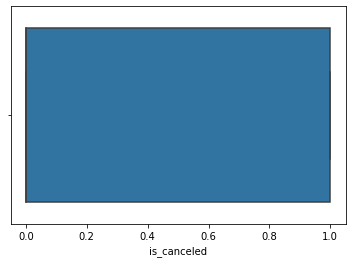

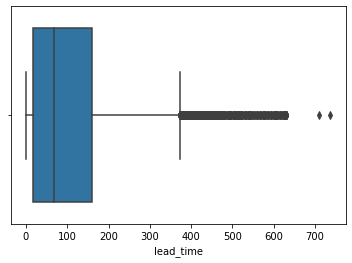

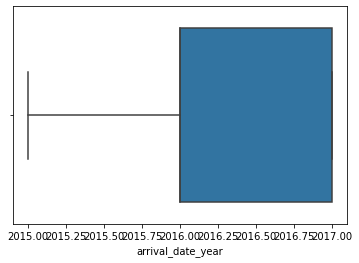

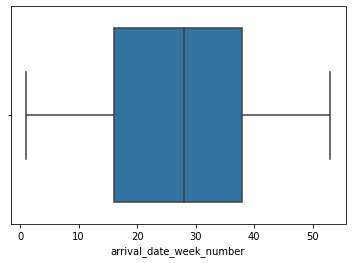

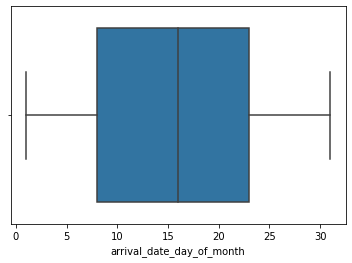

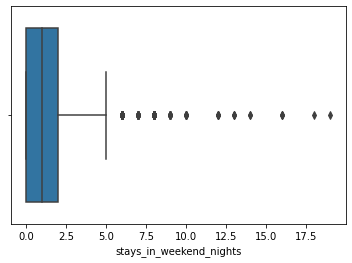

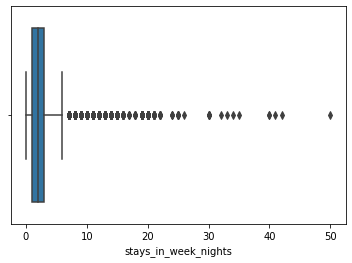

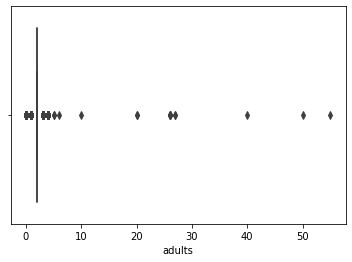

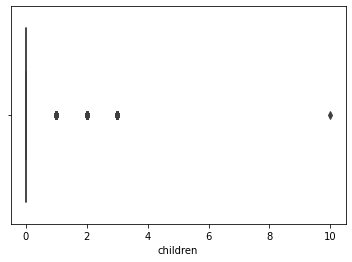

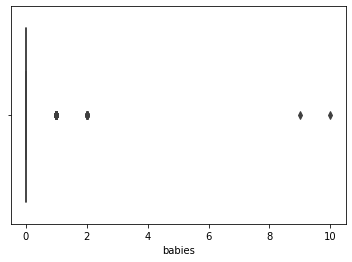

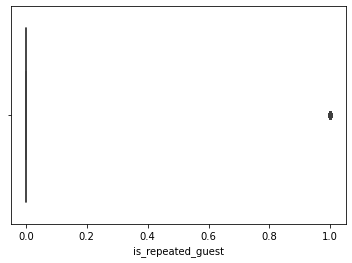

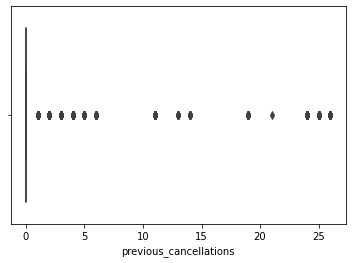

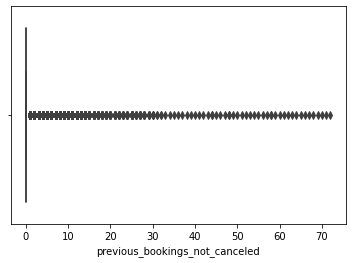

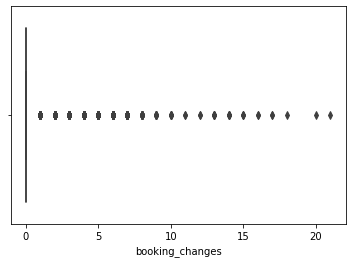

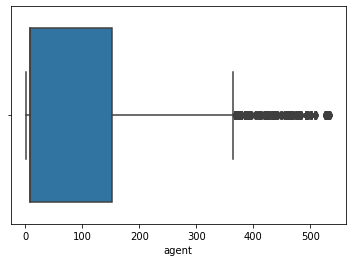

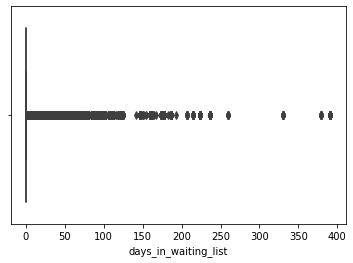

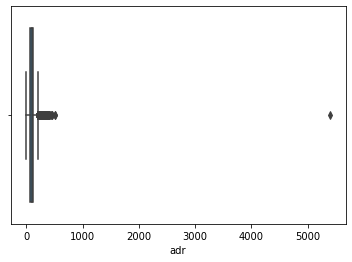

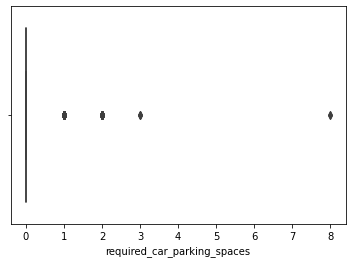

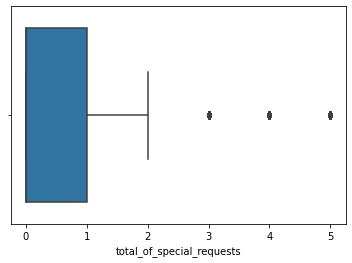

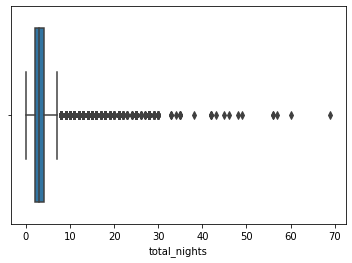

In [172]:
for column in numeric_columns:
  sns.boxplot(x=df[column])
  plt.show()

#### we have outliers in:
*    lead_time
*    stays_in_weekend_nights
*    stays_in_week_nights
*    adults
*    children
*    babies
*    is_repeated_guest
*    previous_cancellations
*    previous_bookings_not_canceled
*    booking_changes
*    agent (but is can't be changed as it's the code of the agent)
*    days_in_waiting_list
*    adr
*    required_car_parking_spaces
*    total_of_special_requests
*    days_in_waiting_list
*    total_nights







In [173]:
! pip install datasist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [174]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.060080,2.321149,101.831122,0.062518,0.571363,3.427900
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,106.323205,17.594721,50.535790,0.245291,0.792798,2.557439
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,69.000000


In [175]:
from datasist.structdata import detect_outliers
outlier_columns = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','agent','adults','children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','days_in_waiting_list','total_nights']
for col in outlier_columns:
  index = detect_outliers(df,0,[col])
  df[col].iloc[index] = df[col].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

dropping columns that won't affect our model

In [176]:
df.drop(columns=['required_car_parking_spaces','country','assigned_room_type','arrival_date_week_number','arrival_date_day_of_month','arrival_date_year','arrival_date_month','reservation_status','distribution_channel','reservation_status_date'],inplace=True)

## Split data into input and output

In [177]:
X= df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [178]:
X.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,is_repeated_guest,...,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,arrival_season,total_nights
0,Resort Hotel,342,0,0,2,0.0,0,BB,Direct,0,...,C,0,No Deposit,9.0,0,Transient,0.0,0,Summer,0
1,Resort Hotel,69,0,0,2,0.0,0,BB,Direct,0,...,C,0,No Deposit,9.0,0,Transient,0.0,0,Summer,0
2,Resort Hotel,7,0,1,2,0.0,0,BB,Direct,0,...,A,0,No Deposit,9.0,0,Transient,75.0,0,Summer,1
3,Resort Hotel,13,0,1,2,0.0,0,BB,Corporate,0,...,A,0,No Deposit,304.0,0,Transient,75.0,0,Summer,1
4,Resort Hotel,14,0,2,2,0.0,0,BB,Online TA,0,...,A,0,No Deposit,240.0,0,Transient,98.0,1,Summer,2


In [179]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

## Dealing with categorical data

nominal data : hotel - meal - market segment - customer type - arrival_season <br>
ordinal data : deposite_type - reserved_room_type

### handling ordinal data

In [181]:
room_type_dict = {'A':1,'D':2,'E':3,'F':4,'G':5,'B':6,'C':7,'H':8,'P':9,'L':10}
deposit = {'No Deposit':0,'Non Refund':1,'Refundable':-1}

In [182]:
X['reserved_room_type']= X['reserved_room_type'].map(room_type_dict)
X['deposit_type'] = X['deposit_type'].map(deposit)
X.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,is_repeated_guest,...,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,arrival_season,total_nights
0,Resort Hotel,342,0,0,2,0.0,0,BB,Direct,0,...,7,0,-1,9.0,0,Transient,0.0,0,Summer,0
1,Resort Hotel,69,0,0,2,0.0,0,BB,Direct,0,...,7,0,-1,9.0,0,Transient,0.0,0,Summer,0
2,Resort Hotel,7,0,1,2,0.0,0,BB,Direct,0,...,1,0,-1,9.0,0,Transient,75.0,0,Summer,1
3,Resort Hotel,13,0,1,2,0.0,0,BB,Corporate,0,...,1,0,-1,304.0,0,Transient,75.0,0,Summer,1
4,Resort Hotel,14,0,2,2,0.0,0,BB,Online TA,0,...,1,0,-1,240.0,0,Transient,98.0,1,Summer,2


### handling nominal data

In [183]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(drop='first')
new_df = one_hot.fit_transform(df[['hotel','meal','market_segment','customer_type','arrival_season']])
new_df = pd.DataFrame(new_df.toarray(),columns = one_hot.get_feature_names_out())
new_df.head()

,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_season_Spring,arrival_season_Summer,arrival_season_Winter
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [184]:
X = pd.concat([X,new_df],axis=1)
X.drop(columns=['hotel','meal','market_segment','customer_type','arrival_season'],inplace=True)
X.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,...,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_season_Spring,arrival_season_Summer,arrival_season_Winter
0,342,0,0,2,0.0,0,0,0,0,7,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,69,0,0,2,0.0,0,0,0,0,7,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7,0,1,2,0.0,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,13,0,1,2,0.0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,14,0,2,2,0.0,0,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Split data into train and test

In [185]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=0,stratify=y)

## Handling imbalnced data

In [186]:
y_train.value_counts()

0    60133
1    35379
Name: is_canceled, dtype: int64

In [187]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_train , y_train = over_sample.fit_resample(x_train,y_train)

In [188]:
y_train.value_counts()

0    60133
1    60133
Name: is_canceled, dtype: int64

## Feature Scaling

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [190]:
x_train = pd.DataFrame(x_train,columns=scaler.get_feature_names_out())
x_test = pd.DataFrame(x_test,columns=scaler.get_feature_names_out())

In [191]:
x_train.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,...,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_season_Spring,arrival_season_Summer,arrival_season_Winter
0,0.673673,1.208389,0.539259,0.0,0.0,0.0,0.0,0.0,0.0,-0.448022,...,-0.319398,-0.483929,-0.500277,1.059380,-0.064336,0.554773,-0.496931,-0.62659,-0.685737,2.236557
1,-0.503991,-0.944222,-0.927823,0.0,0.0,0.0,0.0,0.0,0.0,0.444002,...,-0.319398,-0.483929,-0.500277,1.059380,-0.064336,0.554773,-0.496931,-0.62659,-0.685737,2.236557
2,-0.835878,-0.944222,-0.927823,0.0,0.0,0.0,0.0,0.0,0.0,-0.448022,...,3.175392,-0.483929,-0.500277,-0.951547,-0.064336,0.554773,-0.496931,-0.62659,-0.685737,2.236557
3,-1.039293,-0.944222,1.272800,0.0,0.0,0.0,0.0,0.0,0.0,-0.448022,...,-0.319398,-0.483929,2.014160,-0.951547,-0.064336,0.554773,-0.496931,-0.62659,-0.685737,2.236557
4,-1.007175,0.132084,-0.194282,0.0,0.0,0.0,0.0,0.0,0.0,-0.448022,...,-0.319398,2.075820,-0.500277,-0.951547,-0.064336,-1.822341,2.031125,-0.62659,1.493421,-0.457575


In [192]:
x_test.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,...,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_season_Spring,arrival_season_Summer,arrival_season_Winter
0,-0.386225,1.208389,-0.194282,0.0,0.0,0.0,0.0,0.0,0.0,-0.448022,...,-0.319398,-0.483929,2.014160,-0.951547,-0.064336,0.554773,-0.496931,1.642666,-0.685737,-0.457575
1,-1.082117,-0.944222,-0.927823,0.0,0.0,0.0,0.0,0.0,0.0,-0.448022,...,3.175392,-0.483929,-0.500277,-0.951547,-0.064336,0.554773,-0.496931,-0.626590,-0.685737,2.236557
2,-1.049999,-0.944222,1.272800,0.0,0.0,0.0,0.0,0.0,0.0,-0.448022,...,-0.319398,-0.483929,-0.500277,1.059380,-0.064336,0.554773,-0.496931,-0.626590,-0.685737,2.236557
3,-0.653875,-0.944222,-0.927823,0.0,0.0,0.0,0.0,0.0,0.0,0.444002,...,-0.319398,-0.483929,-0.500277,-0.951547,-0.064336,0.554773,-0.496931,-0.626590,1.493421,-0.457575
4,0.373904,1.208389,-0.194282,0.0,0.0,0.0,0.0,0.0,0.0,-0.448022,...,-0.319398,-0.483929,2.014160,-0.951547,-0.064336,0.554773,-0.496931,-0.626590,-0.685737,-0.457575
